In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/vanilla_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 87s 6ms/step


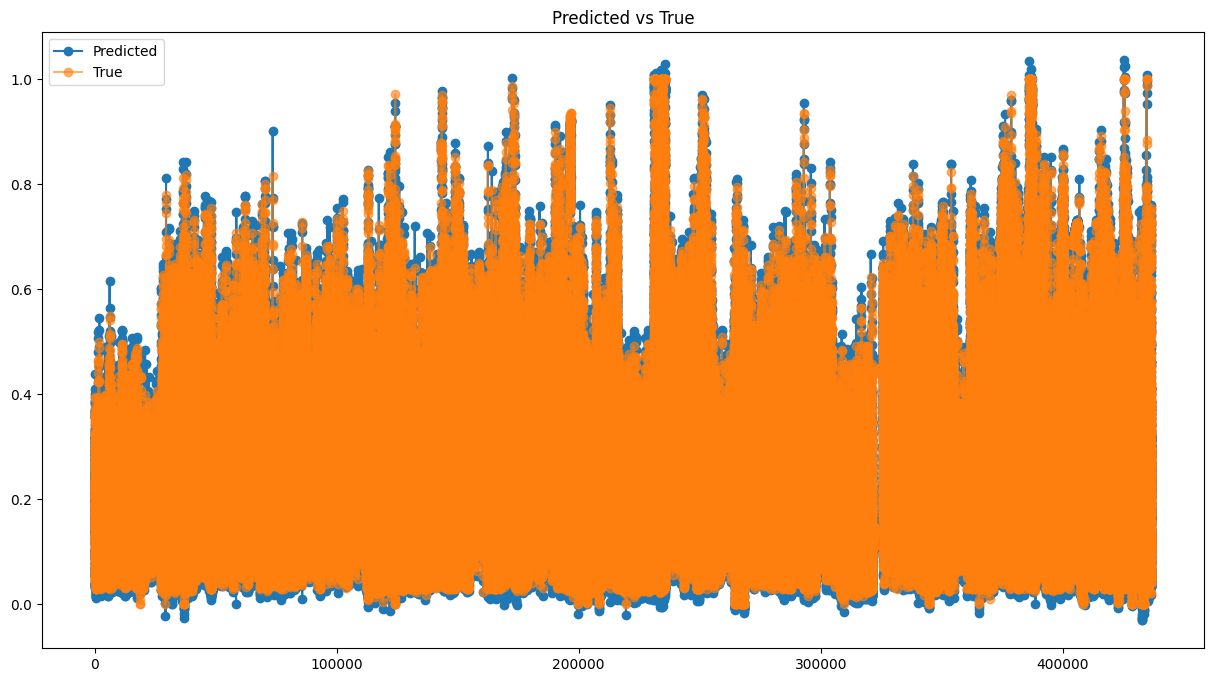

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02775726944604968,
 'mse': 0.038731707095516474,
 'rmse': 0.001500145134532881}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          146.728149
1          147.675812
2          142.988388
3          145.248474
4          141.766006
...               ...
436585      83.895615
436586     137.884979
436587     170.724365
436588     209.179749
436589     200.413544

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  146.728149
2023-01-01 00:15:00   140.0  147.675812
2023-01-01 00:30:00   139.0  142.988388
2023-01-01 00:45:00   145.0  145.248474
2023-01-01 01:00:00   159.0  141.766006
...                     ...         ...
2035-06-14 18:15:00   137.0   83.895615
2035-06-14 18:30:00   177.0  137.884979
2035-06-14 18:45:00   198.0  170.724365
2035-06-14 19:00:00   216.0  209.179749
2035-06-14 19:15:00   233.0  200.413544

[436590 rows x 2 columns]

AP, BE, EP: (0.9101672282169271, 0.06743871238166789, 0.022394059401404983)


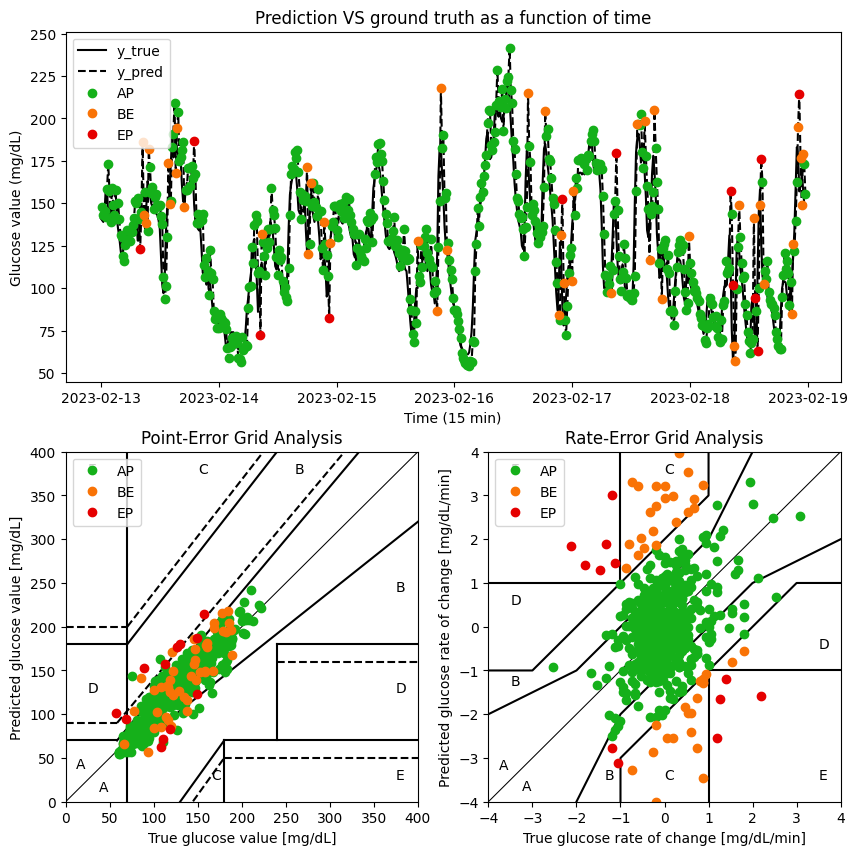

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-13 00:00:00   141.0  146.728149       NaN       NaN    NaN   
1      2023-02-13 00:15:00   140.0  147.675812 -0.066667  0.063177     AP   
2      2023-02-13 00:30:00   139.0  142.988388 -0.066667 -0.312495     AP   
3      2023-02-13 00:45:00   145.0  145.248474  0.400000  0.150672     AP   
4      2023-02-13 01:00:00   159.0  141.766006  0.933333 -0.232165     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-27 18:15:00   137.0   83.895615  2.333333  0.078691     BE   
436586 2035-07-27 18:30:00   177.0  137.884979  2.666667  3.599291     AP   
436587 2035-07-27 18:45:00   198.0  170.724365  1.400000  2.189292     AP   
436588 2035-07-27 19:00:00   216.0  209.179749  1.200000  2.563692     AP   
436589 2035-07-27 19:15:00   233.0  200.413544  1.133333 -0.584414     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     B  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 49ms/step


Glucose level Predict  Glucose level True
0               0.232018            0.219565
1               0.234078            0.217391

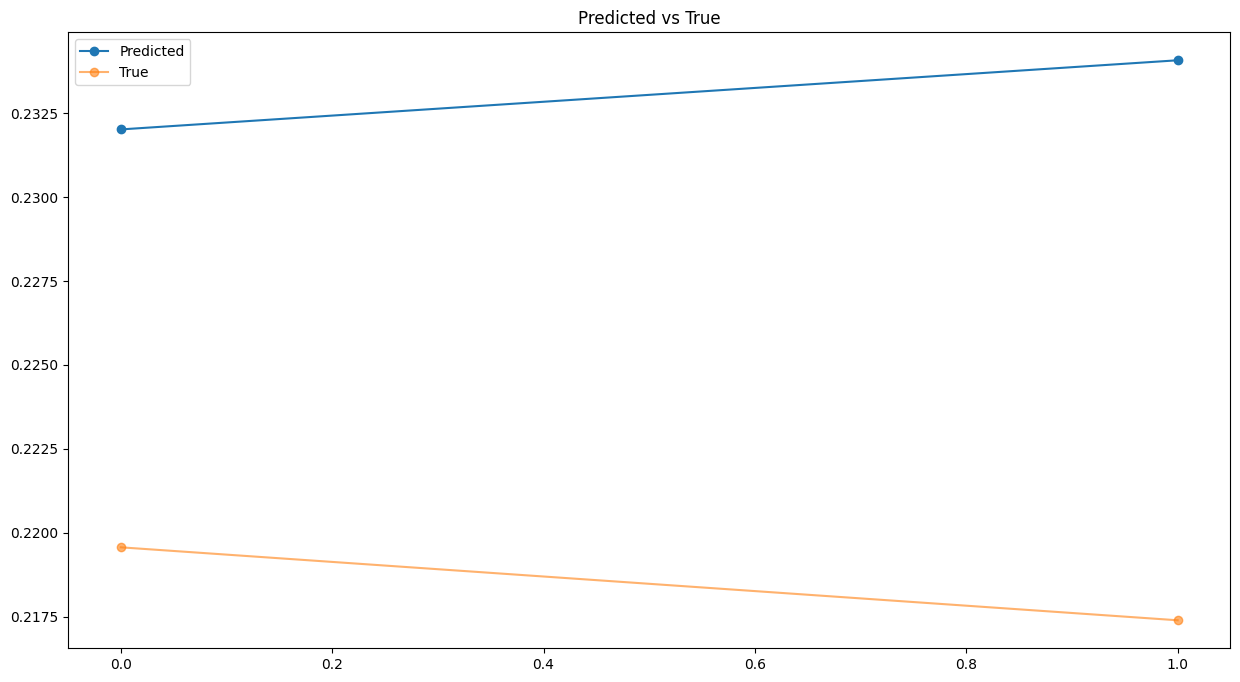

{'mae': 0.01456950760405995,
 'mse': 0.014722512149744797,
 'rmse': 0.00021675236399938314}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             146.728149               141.0
1             147.675812               140.0

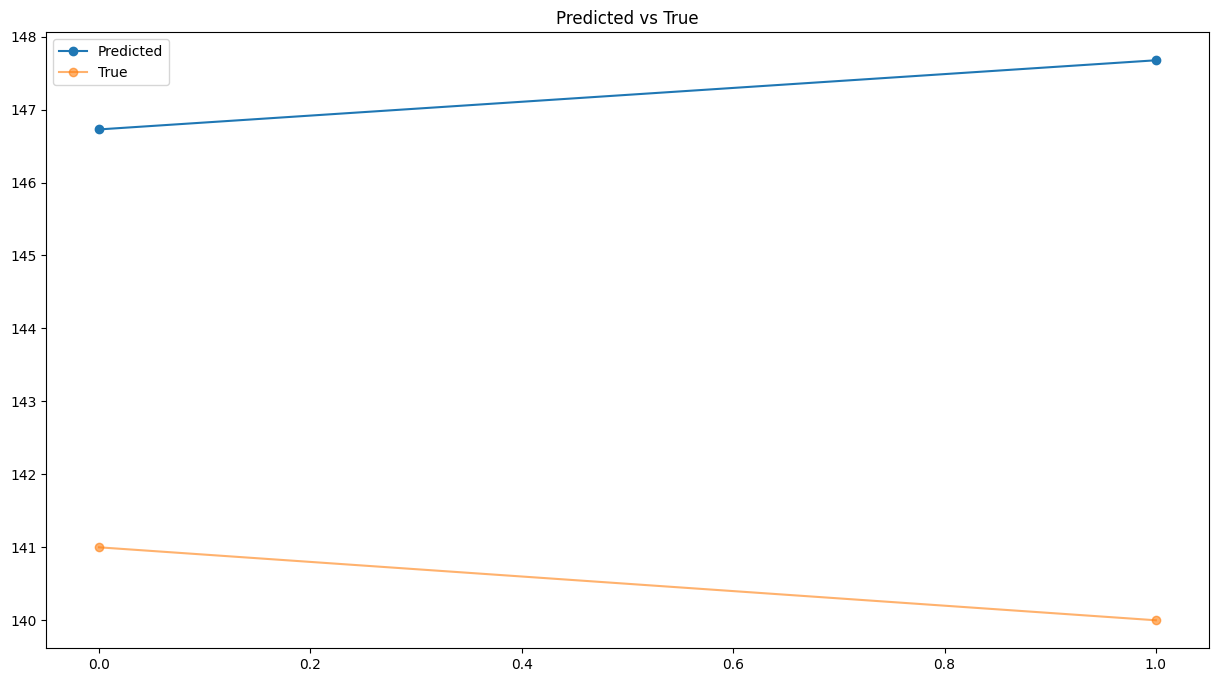

{'mae': 6.7019805908203125, 'mse': 6.77236229099992, 'rmse': 45.86489100055769}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 36ms/step


Glucose level Predict  Glucose level True
0               0.232018            0.219565
1               0.251770            0.217391

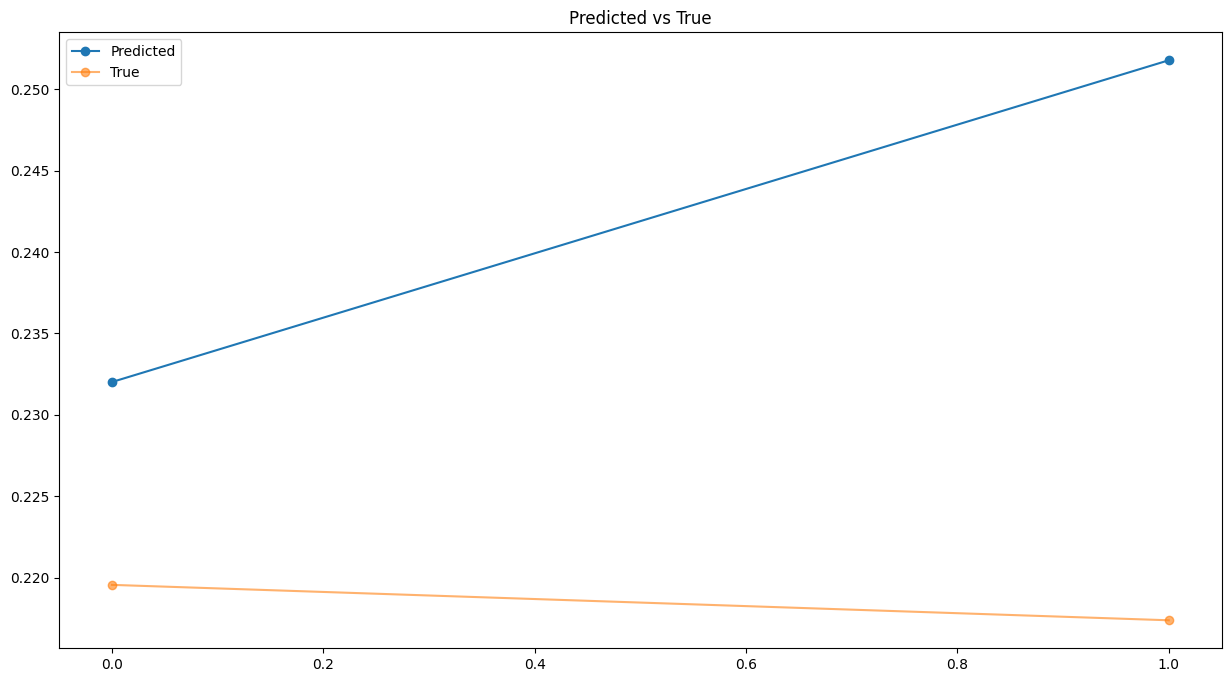

{'mae': 0.023415745859560744,
 'mse': 0.025855181010452057,
 'rmse': 0.0006684903850832407}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             146.728149               141.0
1             155.814346               140.0

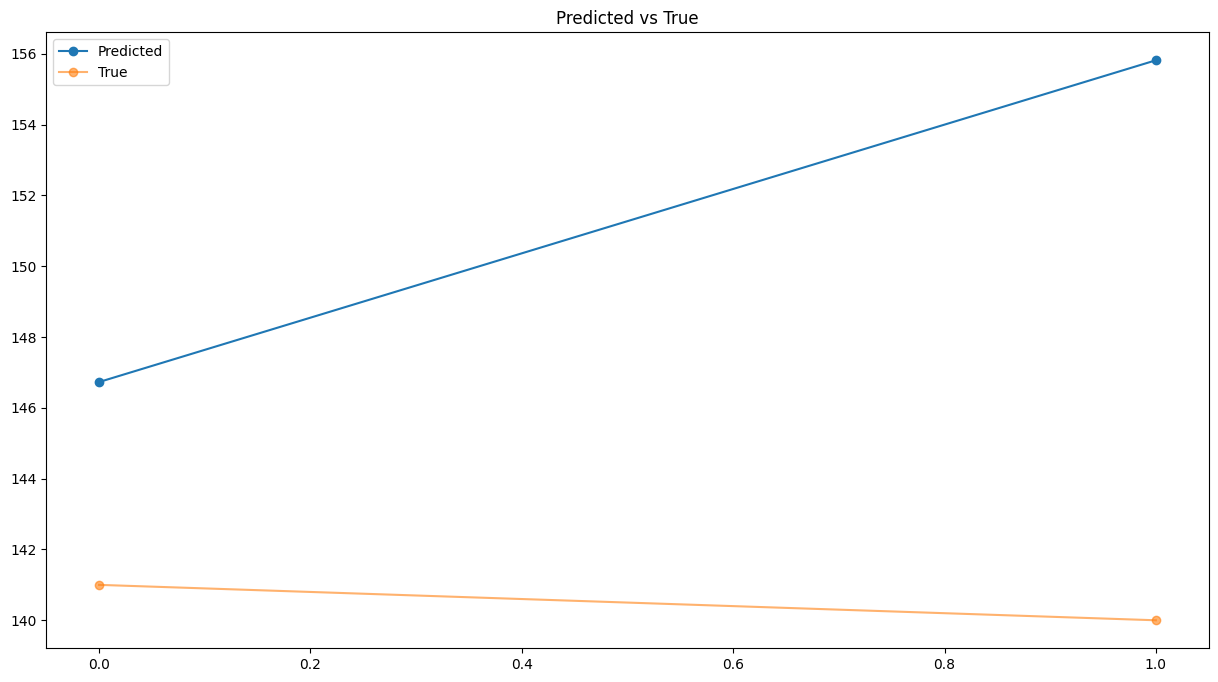

{'mae': 10.771247863769531,
 'mse': 11.893385662467907,
 'rmse': 141.45262251619715}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.283290            0.182609
1               0.242858            0.154348
2               0.151628            0.152174
3               0.168604            0.150000
4               0.159636            0.123913

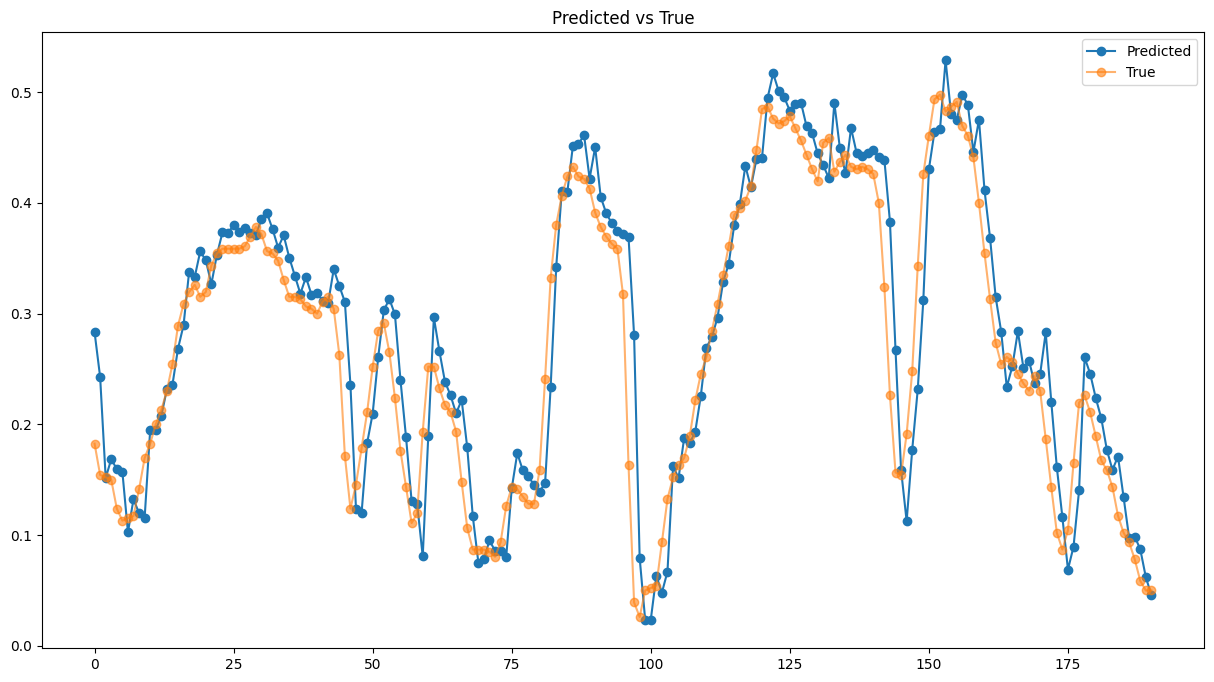

{'mae': 0.03431924366202029,
 'mse': 0.048804291184716624,
 'rmse': 0.002381858838042609}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

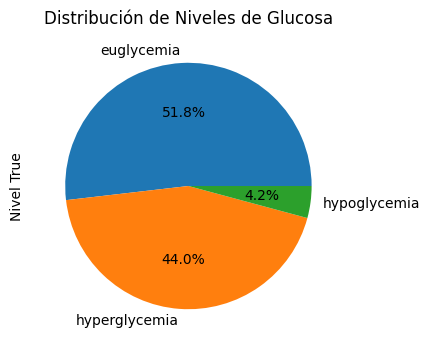

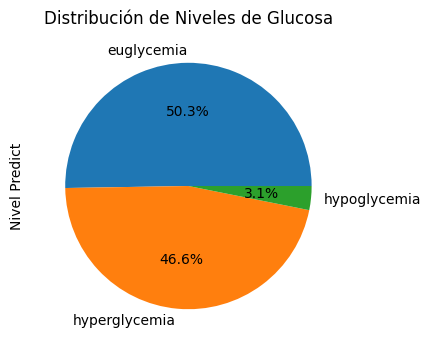

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             170.313507    euglycemia
1               111.0  euglycemia             151.714844    euglycemia
2               110.0  euglycemia             109.748779    euglycemia
3               109.0  euglycemia             117.557770    euglycemia
4                97.0  euglycemia             113.432449    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


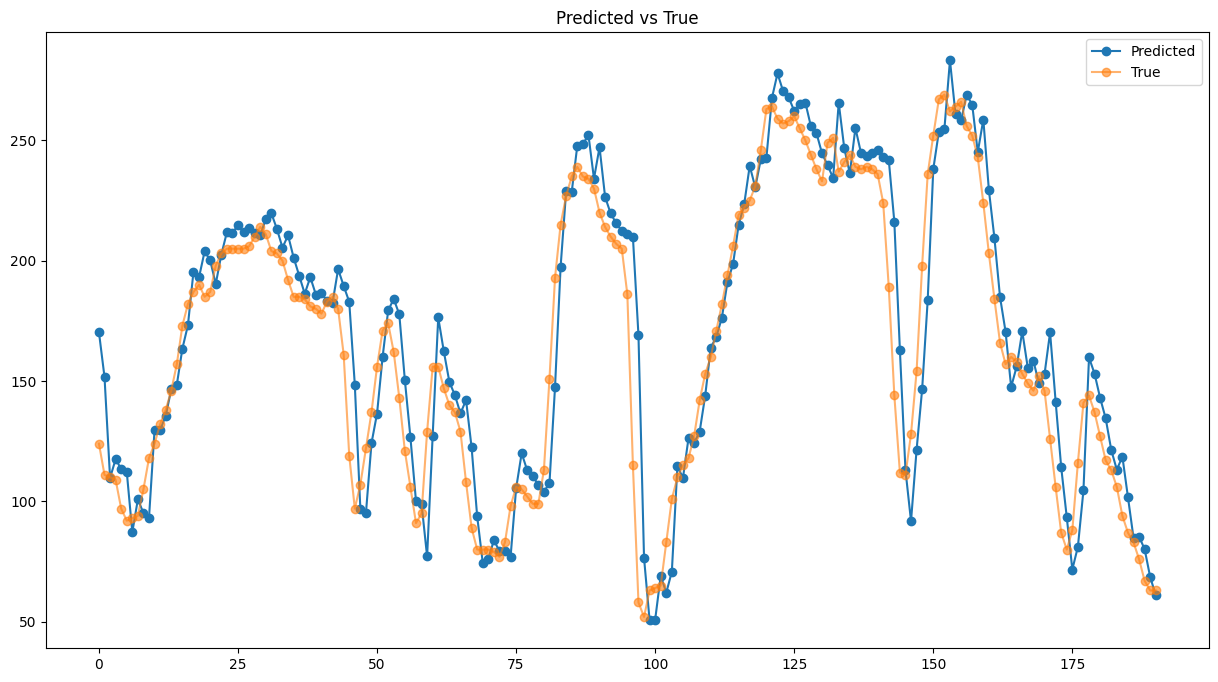

{'mae': 15.78685135367029,
 'mse': 22.449973959123017,
 'rmse': 504.00133076530165}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  170.313507
2023-01-01 00:15:00   111.0  151.714844
2023-01-01 00:30:00   110.0  109.748779
2023-01-01 00:45:00   109.0  117.557770
2023-01-01 01:00:00    97.0  113.432449
...                     ...         ...
2023-01-02 22:30:00    83.0   84.884911
2023-01-02 22:45:00    76.0   85.399742
2023-01-02 23:00:00    67.0   80.146164
2023-01-02 23:15:00    63.0   68.550858
2023-01-02 23:30:00    63.0   61.016457

[191 rows x 2 columns]

AP, BE, EP: (0.8947368421052632, 0.07894736842105263, 0.02631578947368421)


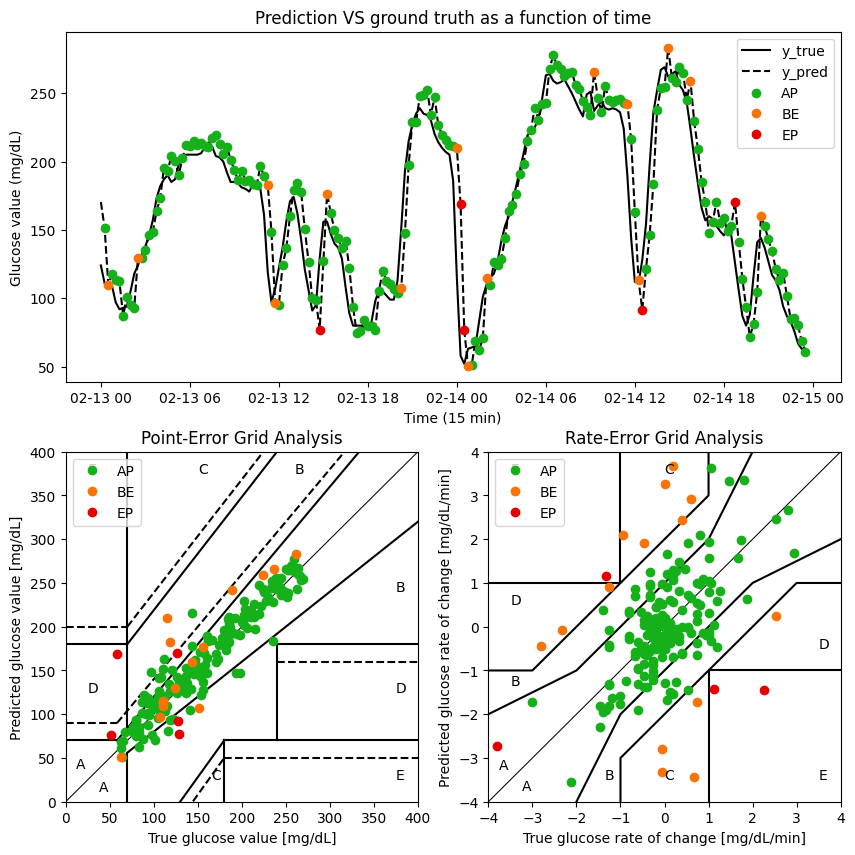

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.343183            0.373913
1               0.395091            0.400000
2               0.405166            0.404348
3               0.445565            0.406522
4               0.413344            0.397826

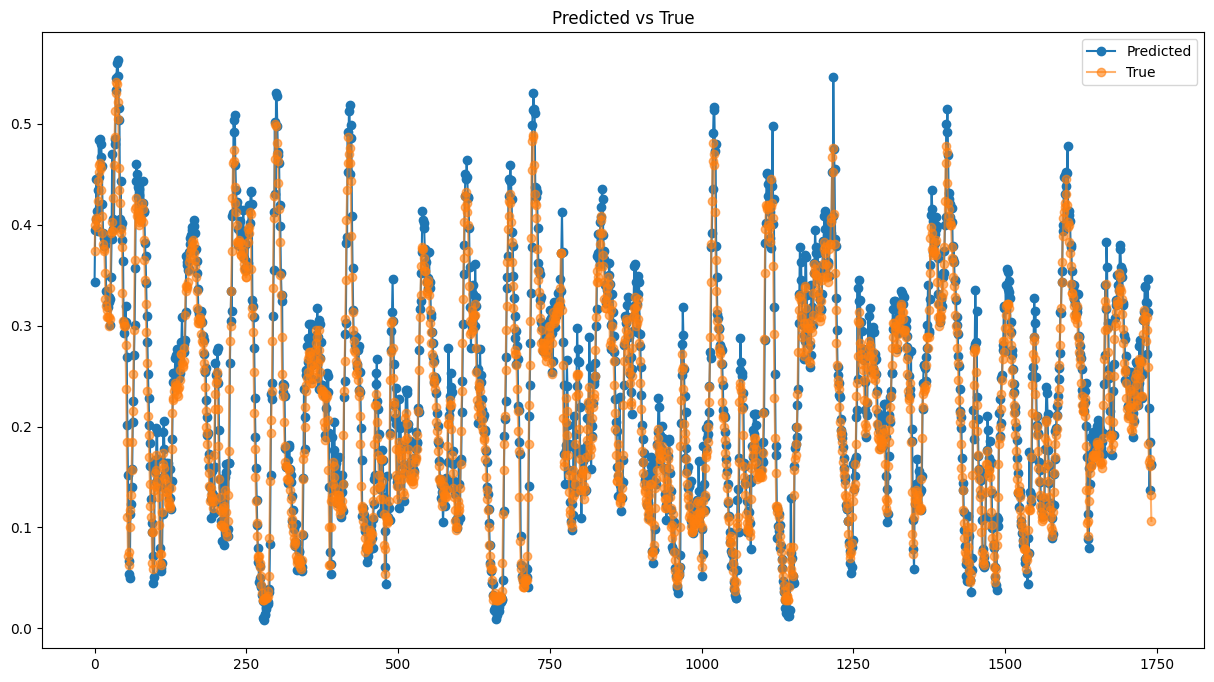

{'mae': 0.02396962898557865,
 'mse': 0.030767406817253345,
 'rmse': 0.0009466333222583676}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

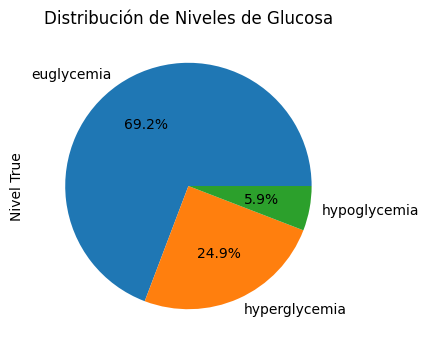

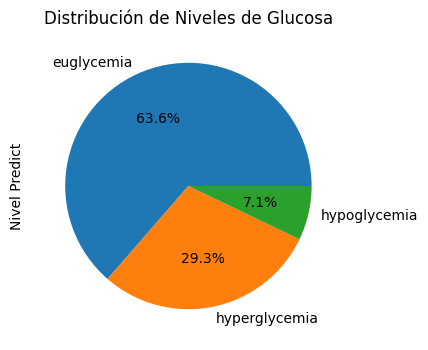

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             197.864075  hyperglycemia
1               224.0  hyperglycemia             221.741699  hyperglycemia
2               226.0  hyperglycemia             226.376358  hyperglycemia
3               227.0  hyperglycemia             244.959686  hyperglycemia
4               223.0  hyperglycemia             230.138214  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


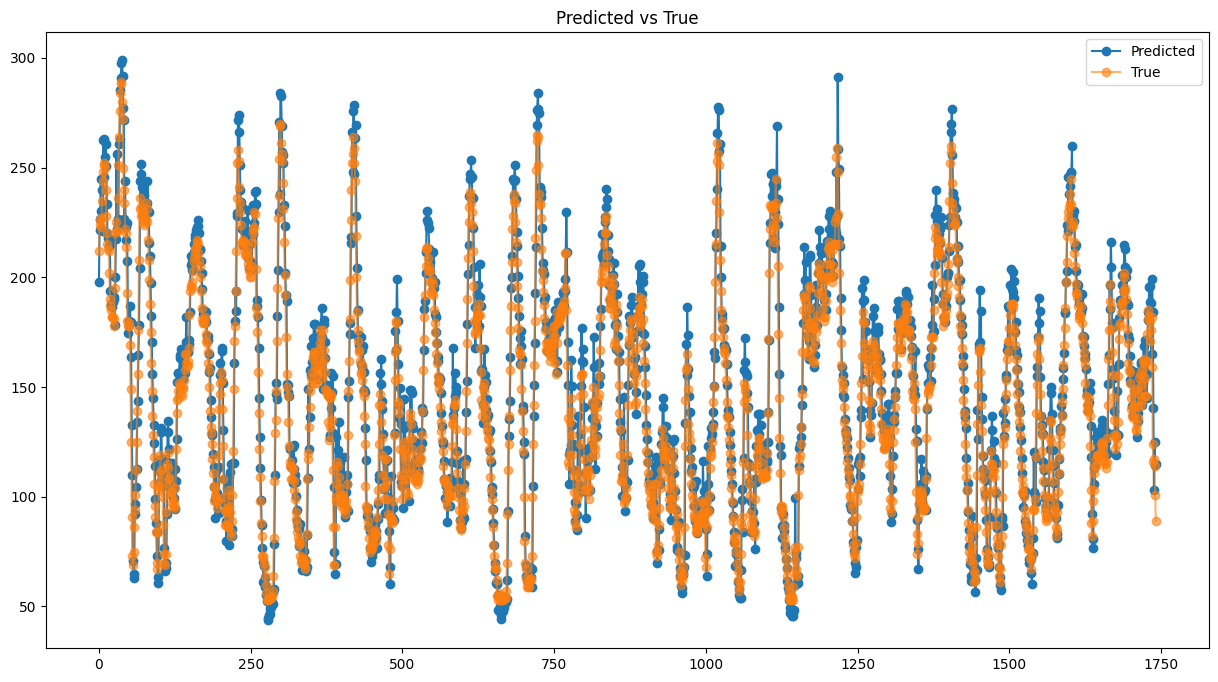

{'mae': 11.026029868405121,
 'mse': 14.153007504891008,
 'rmse': 200.30762143350117}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  197.864075
2023-01-01 00:15:00   224.0  221.741699
2023-01-01 00:30:00   226.0  226.376358
2023-01-01 00:45:00   227.0  244.959686
2023-01-01 01:00:00   223.0  230.138214
...                     ...         ...
2023-01-19 02:15:00   116.0  140.434097
2023-01-19 02:30:00   117.0  103.107857
2023-01-19 02:45:00   114.0  124.984451
2023-01-19 03:00:00   101.0  114.632278
2023-01-19 03:15:00    89.0  114.854141

[1742 rows x 2 columns]

AP, BE, EP: (0.9506031016657094, 0.04250430786904078, 0.0068925904652498565)


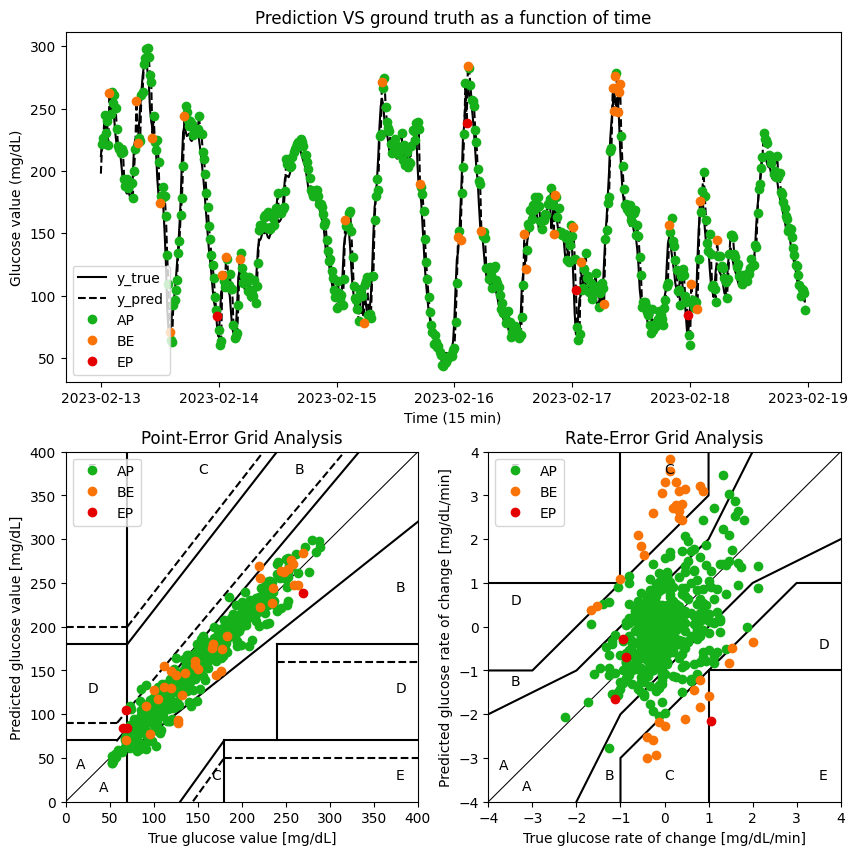

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.313242            0.261858
1               0.261626            0.229051
2               0.242262            0.196245
3               0.194260            0.163439
4               0.173904            0.130632

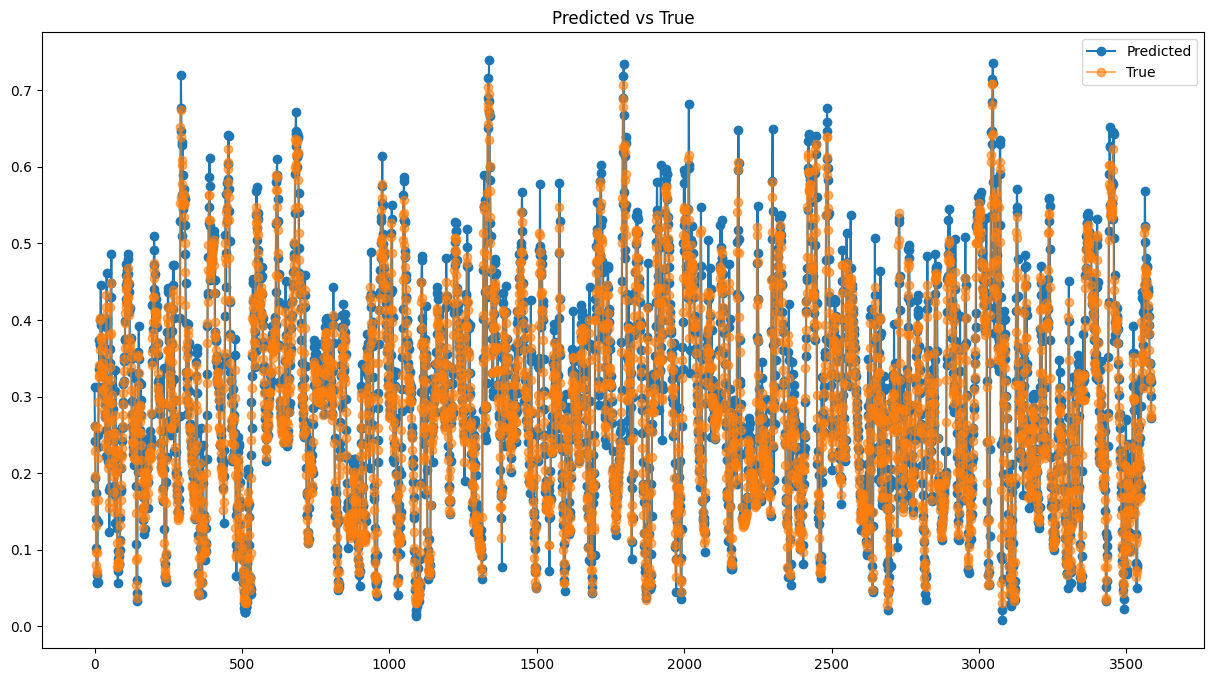

{'mae': 0.03504811412081432,
 'mse': 0.04794115024064826,
 'rmse': 0.002298353886396409}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

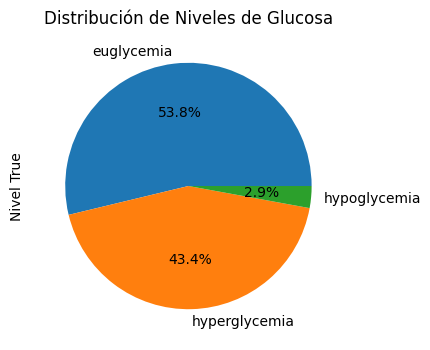

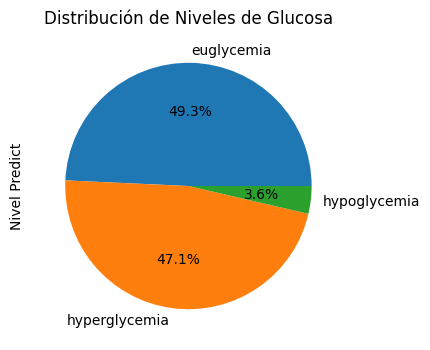

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             184.091202  hyperglycemia
1          145.363636  euglycemia             160.347992     euglycemia
2          130.272727  euglycemia             151.440613     euglycemia
3          115.181818  euglycemia             129.359390     euglycemia
4          100.090909  euglycemia             119.995705     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


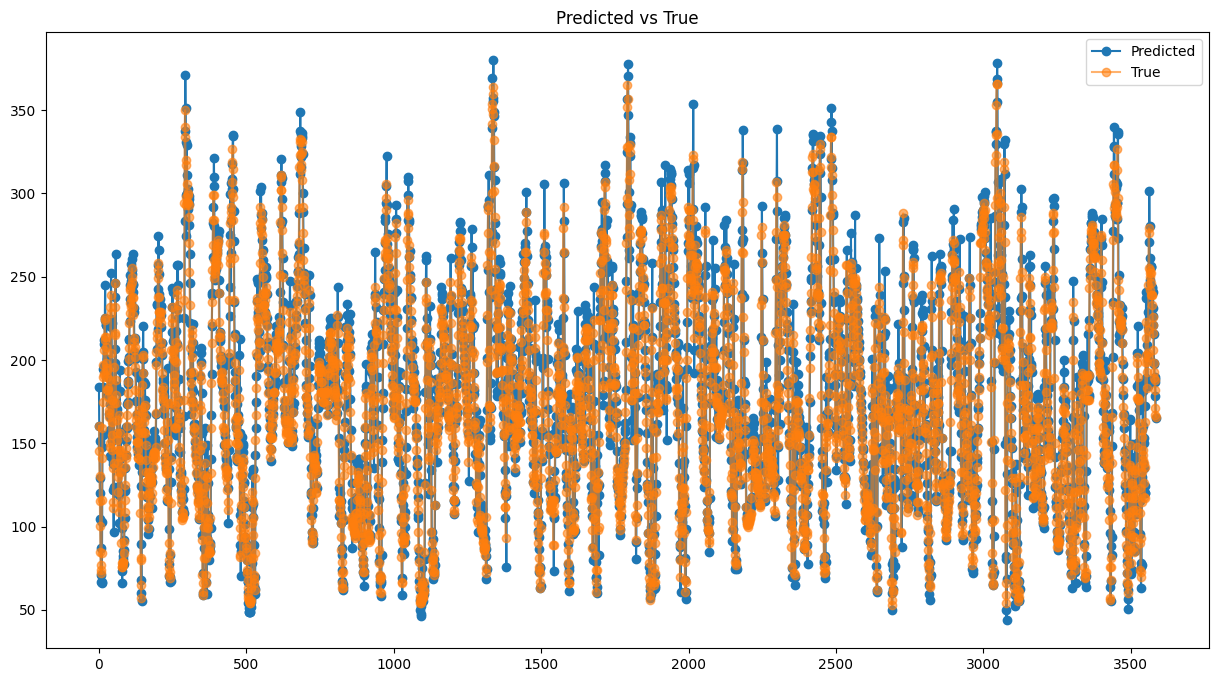

{'mae': 16.12213215395321,
 'mse': 22.052928456745956,
 'rmse': 486.33165351835555}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  184.091202
2023-01-01 00:15:00  145.363636  160.347992
2023-01-01 00:30:00  130.272727  151.440613
2023-01-01 00:45:00  115.181818  129.359390
2023-01-01 01:00:00  100.090909  119.995705
...                         ...         ...
2023-02-07 07:15:00  188.000000  189.798370
2023-02-07 07:30:00  182.000000  188.677094
2023-02-07 07:45:00  171.000000  186.759659
2023-02-07 08:00:00  167.000000  178.545822
2023-02-07 08:15:00  166.000000  164.986710

[3586 rows x 2 columns]

AP, BE, EP: (0.8739191073919107, 0.0895397489539749, 0.036541143654114365)


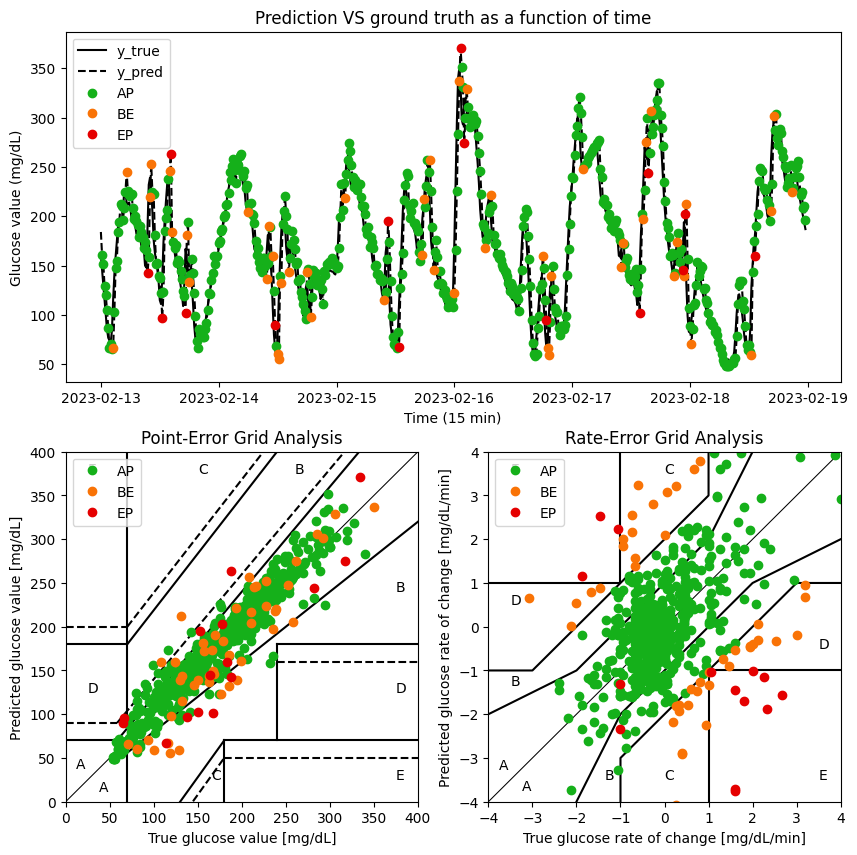

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.554426            0.534783
1               0.558851            0.500000
2               0.542599            0.484783
3               0.474796            0.463043
4               0.499228            0.428261

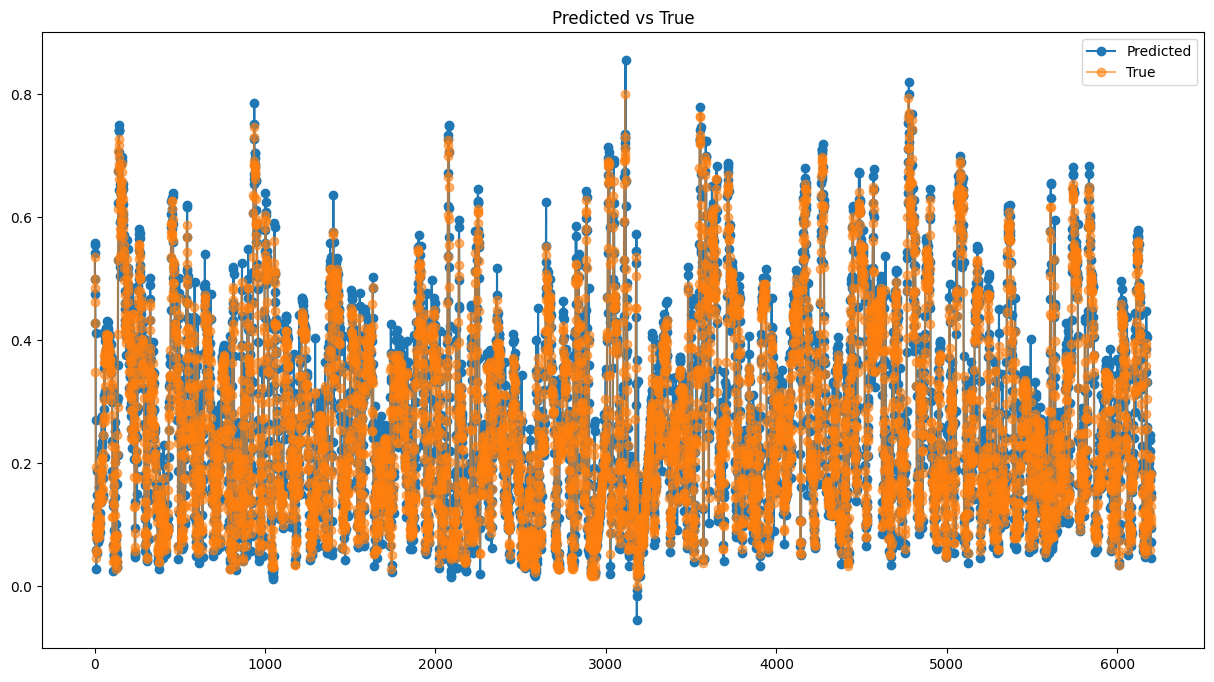

{'mae': 0.038548919507290946,
 'mse': 0.05399102062934811,
 'rmse': 0.0029150303085986934}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

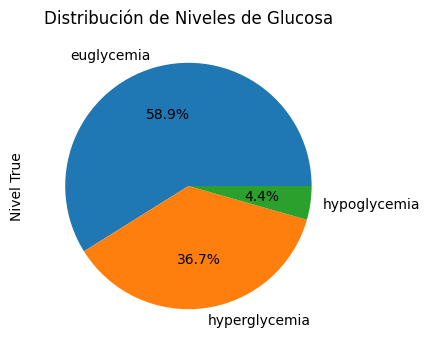

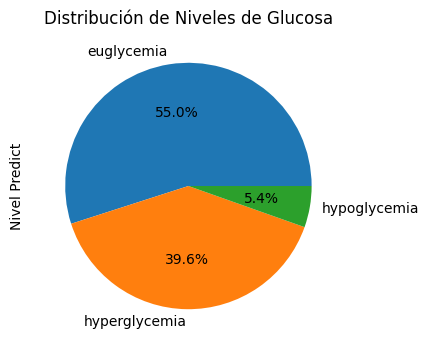

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             295.036072  hyperglycemia
1               270.0  hyperglycemia             297.071228  hyperglycemia
2               263.0  hyperglycemia             289.595673  hyperglycemia
3               253.0  hyperglycemia             258.406281  hyperglycemia
4               237.0  hyperglycemia             269.644928  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


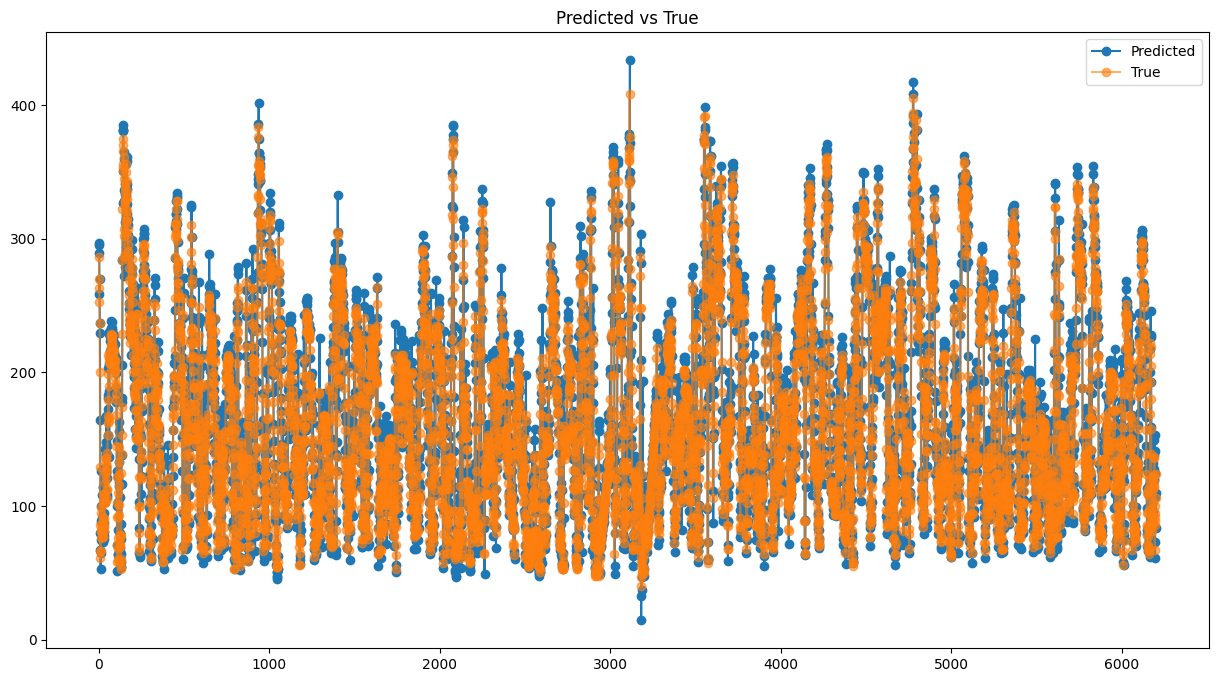

{'mae': 17.73250268501, 'mse': 24.835869094984083, 'rmse': 616.8203937031856}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  295.036072
2023-01-01 00:15:00   270.0  297.071228
2023-01-01 00:30:00   263.0  289.595673
2023-01-01 00:45:00   253.0  258.406281
2023-01-01 01:00:00   237.0  269.644928
...                     ...         ...
2023-03-06 13:00:00   100.0   61.398495
2023-03-06 13:15:00    89.0  124.513939
2023-03-06 13:30:00    92.0  106.821030
2023-03-06 13:45:00   106.0   83.913895
2023-03-06 14:00:00   124.0  109.952713

[6201 rows x 2 columns]

AP, BE, EP: (0.829516129032258, 0.11935483870967742, 0.05112903225806452)


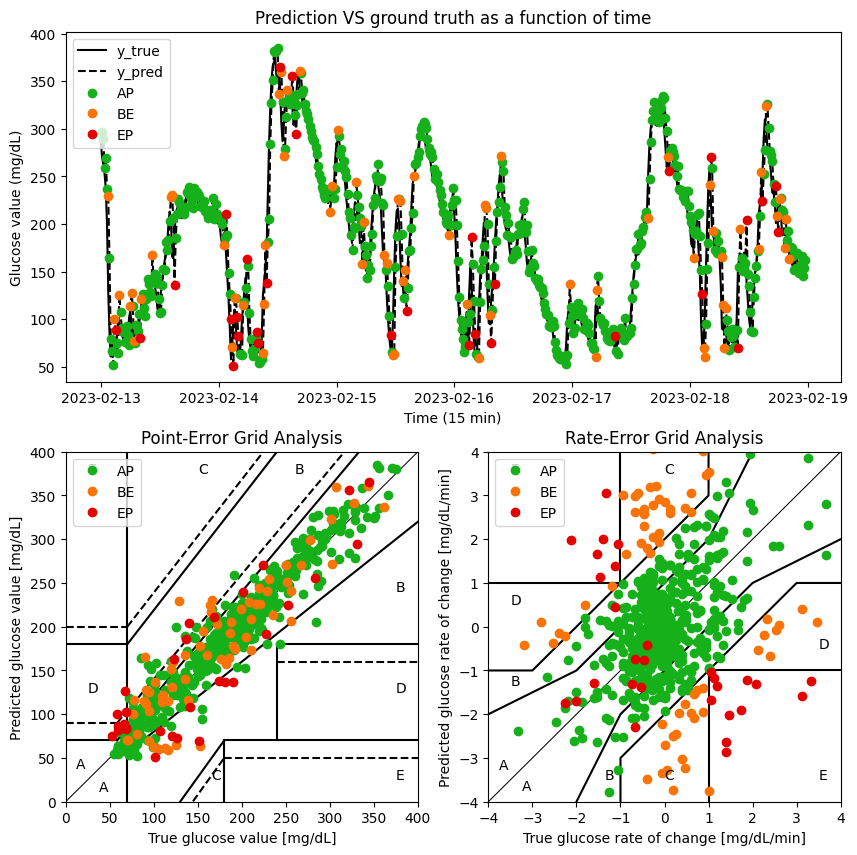

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)